In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import VarianceThreshold
import lazypredict
from lazypredict.Supervised import LazyRegressor
import lightgbm as ltb
import math
from scipy import stats

C:\Users\gj979\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X = pd.read_csv('Rk_Fingerprints.csv')
X.drop('Name', axis=1, inplace=True)
X

,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,KRFP10,...,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6942,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6944,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Y = pd.read_csv('AChE_Bioactivity_data_4.csv')
Y = Y['pIC50']
Y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
6941   6.60
6942   7.52
6943   4.54
6944   8.19
6945   7.10
Name: pIC50, Length: 6946, dtype: float64

In [4]:
df3 = pd.concat([X, Y], axis=1)
df3.to_csv('AChE_Bioactivity_Data_Final_4.csv', index=False)

In [5]:
def remove_low_variance(input_data, threshold):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X.shape

(6946, 121)

In [6]:
p_value = []
col_name = []
names = []
for x in X.columns:
    w = stats.pearsonr(df3[x], Y)
    p_value.append(w[1])
    col_name.append(x)
Imp = pd.DataFrame({'Column_name':col_name,
                    'p-value':p_value})
filt = Imp['p-value'] > 0.05
df = Imp[filt]
for i in df['Column_name']:
    names.append(i)

X.drop(names, axis=1, inplace=True)
X.shape

(6946, 98)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print(f"{X_train.shape} \t {Y_train.shape} \n {X_test.shape} \t {Y_test.shape}")

(5556, 98) 	 (5556,) 
 (1390, 98) 	 (1390,)


In [8]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)
predictions_test

100%|██████████| 42/42 [01:02<00:00,  1.50s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.20,0.26,1.35,0.17
HistGradientBoostingRegressor,0.20,0.25,1.35,3.70
NuSVR,0.18,0.23,1.37,2.71
SVR,0.16,0.22,1.38,3.49
XGBRegressor,0.15,0.21,1.39,0.46
RandomForestRegressor,0.14,0.20,1.39,3.06
GradientBoostingRegressor,0.14,0.20,1.40,1.12
KNeighborsRegressor,0.12,0.18,1.41,1.00
BaggingRegressor,0.11,0.17,1.42,0.48


[(0.0, 1.0)]

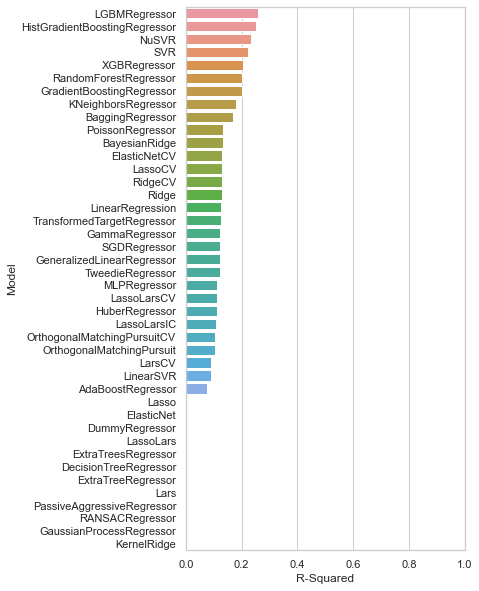

In [9]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

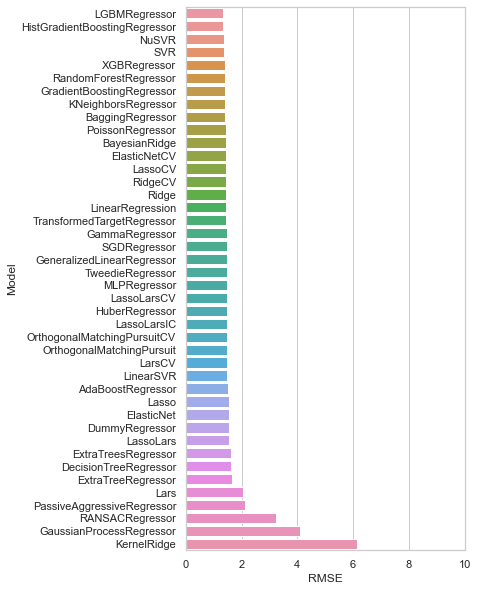

In [10]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_test)
ax.set(xlim=(0, 10))

In [11]:
model = RandomForestRegressor(max_depth=12, min_samples_split=8, n_estimators=250, min_samples_leaf=12)
model.fit(X_train, Y_train)
Y_pred_r = model.predict(X_test)
r2_score(Y_test, Y_pred_r)

0.24371008136612993

In [12]:
Y_pred_r

array([5.33624783, 5.78406369, 5.31855513, ..., 5.66729474, 5.36166208,
       5.9588099 ])

<function matplotlib.pyplot.show(close=None, block=None)>

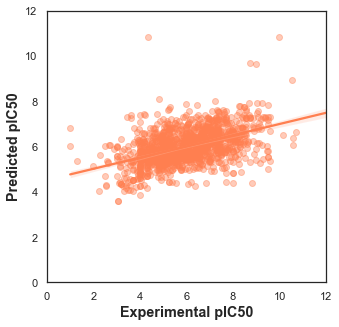

In [13]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred_r, scatter_kws={'alpha':0.4}, color='coral')
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show